# Support Vector Machine

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold, StratifiedKFold

In [3]:
from preprocessing import prepararSetDeDatos
from preprocessing import svmPreprocessing

In [4]:
from sklearn.svm import SVC

In [5]:
X = pd.read_csv('Datasets/tp-2020-2c-train-cols2.csv')
y = pd.read_csv('Datasets/tp-2020-2c-train-cols1.csv')
X,y = prepararSetDeDatos(X,y)

In [6]:
X_svm = svmPreprocessing(X)

## Funciones Auxiliares

In [12]:
def obtenerMejoresParamatros(datosPreprocesados):
    mejor_valor = 0
    mejor_c = None
    mejor_kernel = None
    y_array=np.array(y)
    for c in [1,5,10,15,20,25,30,50,75,100,200]:
        for kernel in ["poly", "rbf", "sigmoid"]:
            kf = StratifiedKFold(n_splits=5)
            metricas = []
            for fold_idx, (train_index, test_index) in enumerate(kf.split(datosPreprocesados, y_array)):
                svm = SVC(C = c, kernel = kernel)
                svm.fit(datosPreprocesados[train_index], y_array[train_index].ravel())
                predicciones = svm.predict(datosPreprocesados[test_index])
                score_obtenida = roc_auc_score(y_array[test_index],predicciones)
                metricas.append(score_obtenida)

            if np.mean(metricas) >= mejor_valor:
                mejor_valor = np.mean(metricas)
                mejor_c = c
                mejor_kernel = kernel
            
    return mejor_valor, mejor_c, mejor_kernel

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_svm, y, test_size=0.25, random_state=0)

### Buscamos los mejores parametros

In [13]:
mejor_valor, mejor_c, mejor_kernel = obtenerMejoresParametros(X_svm)

In [14]:
print(mejor_valor)
print(mejor_c)
print(mejor_kernel)

0.8040448572102271
200
rbf


### Evaluamos las metricas

In [15]:
svm = SVC(C=mejor_c, kernel=mejor_kernel, probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['No vuelve','Vuelve']))

              precision    recall  f1-score   support

   No vuelve       0.86      0.88      0.87       121
      Vuelve       0.82      0.79      0.80        80

    accuracy                           0.85       201
   macro avg       0.84      0.84      0.84       201
weighted avg       0.85      0.85      0.85       201



C:\Users\Adrian\anaconda3\envs\Pandas\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Graficamos la curva ROC

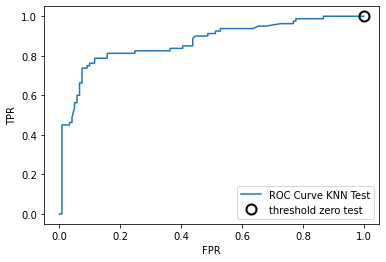

In [16]:
fpr_svm_test,tpr_svm_test,thresholds_svm_test = roc_curve(y_test,svm.predict_proba(X_test)[:,1])

zero_test = np.argmin(np.abs(thresholds_svm_test))

plt.plot(fpr_svm_test,tpr_svm_test,label="ROC Curve KNN Test")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(fpr_svm_test[zero_test],tpr_svm_test[zero_test],'o',markersize=10,label="threshold zero test",fillstyle="none",c="k",mew=2)

plt.legend(loc=4)
plt.show()

In [17]:
auc_svm = roc_auc_score(y_test,svm.predict_proba(X_test)[:, 1])
print("AUC para SVM: {:.3f}".format(auc_svm))

AUC para SVM: 0.869


### Conclusiones